## Part A: Model Code and Exploration

### 1. Perform Exploratory Data Analysis (EDA) and discuss the data and what you observe prior to beginning modeling and how impact, how to proceed [10 pts]

### Data Description

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt 

df = pd.read_csv('8k_diabetes_train.csv')

# get general view of dataset 
df.head()

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,2nd_diag,3rd_diag,ai_response
0,Discharged to home,Transfer from a hospital,?,?,24,2,17,0,0,8,...,No,No,No,No,No,Yes,False,414,428,"Based on the diagnosis code 250.01, which indi..."
1,Discharged to home,Transfer from a hospital,?,?,37,3,14,0,0,8,...,No,No,No,No,No,Yes,False,410,414,"Based on the information provided, I recommend..."
2,Discharged to home,Emergency Room,SP,Emergency/Trauma,60,4,17,0,0,9,...,No,No,No,No,No,No,True,537,786,"Based on the information provided, the patient..."
3,Discharged to home,Emergency Room,?,?,40,3,25,1,0,9,...,No,No,No,No,Ch,Yes,True,425,428,"Based on the information provided, the patient..."
4,Discharged to home,Physician Referral,MD,Surgery-General,31,2,18,0,0,7,...,No,No,No,No,No,Yes,True,682,998,"Based on the information provided, the patient..."


<Axes: xlabel='readmitted', ylabel='count'>

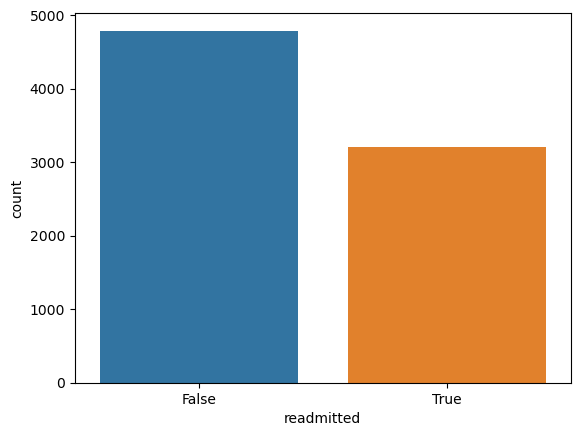

In [25]:
df['readmitted'].value_counts()

sns.countplot(x='readmitted', data=df)

In [26]:
df['readmitted'].value_counts()

readmitted
False    4790
True     3210
Name: count, dtype: int64

* There are **60%** of person not being readmitted and **40%** of person being readmitted in this dataset

#### Information about dataset 

In [207]:
# get data ifno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   discharge_disposition_id  7636 non-null   object
 1   admission_source_id       7248 non-null   object
 2   payer_code                8000 non-null   object
 3   medical_specialty         8000 non-null   object
 4   num_lab_procedures        8000 non-null   int64 
 5   num_procedures            8000 non-null   int64 
 6   num_medications           8000 non-null   int64 
 7   number_outpatient         8000 non-null   int64 
 8   number_emergency          8000 non-null   int64 
 9   number_diagnoses          8000 non-null   int64 
 10  max_glu_serum             534 non-null    object
 11  metformin                 8000 non-null   object
 12  repaglinide               8000 non-null   object
 13  nateglinide               8000 non-null   object
 14  chlorpropamide          

* The dataset has 8000 rows and 40 columns. 
* It is a multi-modal dataset including categorical, numerical, and text data
* Each row represents a unique hospital admission. Columns represent medical details, admission-specific information, prescriptions, diagnoses, and diagnose description (ai_response)
* There exist missing values appear in the dataset 

#### Statistical analysis of dataset

In [188]:
# get statistics of dataset
df.describe()

,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,43.183375,1.391750,15.543375,0.280875,0.108375,7.027875
std,19.518187,1.709575,8.398151,1.075932,0.467608,2.019680
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,32.000000,0.000000,10.000000,0.000000,0.000000,5.000000
50%,44.000000,1.000000,14.000000,0.000000,0.000000,7.000000
75%,57.000000,2.000000,19.000000,0.000000,0.000000,9.000000
max,120.000000,6.000000,75.000000,36.000000,9.000000,9.000000


#### Report of number of unique values in each column

In [189]:
df.nunique()

discharge_disposition_id      19
admission_source_id           10
payer_code                    16
medical_specialty             52
num_lab_procedures           107
num_procedures                 7
num_medications               65
number_outpatient             19
number_emergency              10
number_diagnoses               9
max_glu_serum                  3
metformin                      4
repaglinide                    4
nateglinide                    4
chlorpropamide                 3
glimepiride                    4
acetohexamide                  1
glipizide                      4
glyburide                      4
tolbutamide                    2
pioglitazone                   4
rosiglitazone                  4
acarbose                       3
miglitol                       4
troglitazone                   1
tolazamide                     2
examide                        1
citoglipton                    1
insulin                        4
glyburide.metformin            4
glipizide.

#### Drop columns contain 1 unique value because they don't have impact on training the model
* 'acetohexamide'
* 'troglitazone'
* 'examide'
* 'citoglipton'
* 'glimepiride.pioglitazone'
* 'metformin.rosiglitazone'
* 'metformin.pioglitazone'

In [27]:
drop_list = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        drop_list.append(col)
        df.drop(col,inplace=True,axis=1)

In [28]:
print(drop_list)
df.columns

['acetohexamide', 'troglitazone', 'examide', 'citoglipton', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone']


Index(['discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_diagnoses', 'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'insulin', 'glyburide.metformin',
       'glipizide.metformin', 'change', 'diabetesMed', 'readmitted',
       '2nd_diag', '3rd_diag', 'ai_response'],
      dtype='object')

#### Check duplicate rows and drop if there exist any

In [210]:
# check duplicate
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 33)


* The dataset doesn't have duplicate rows

#### Check percentage of missing values or '?' in each column

In [4]:
for i in df.columns:
    print(i, df[i][df[i] == '?'].count()/len(df) * 100)

discharge_disposition_id 0.0
admission_source_id 0.0
payer_code 53.77499999999999
medical_specialty 40.975
num_lab_procedures 0.0
num_procedures 0.0
num_medications 0.0
number_outpatient 0.0
number_emergency 0.0
number_diagnoses 0.0
max_glu_serum 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
tolazamide 0.0
insulin 0.0
glyburide.metformin 0.0
glipizide.metformin 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0
2nd_diag 0.525
3rd_diag 2.1125000000000003
ai_response 0.0


* There are 4 features that contain missing values
* **payer_code** and **medical_specialty** have high percentage of **54%** and **41%** missing values respectively

#### Report of all values in columns that contain '?' or NaN

In [29]:
import numpy as np
import pandas as pd

missing_cat = ['discharge_disposition_id', 'admission_source_id', 'medical_specialty',
              'payer_code', 'max_glu_serum', '2nd_diag', '3rd_diag']

for m in missing_cat:
    print(df.value_counts(m, dropna=False), '\n')

discharge_disposition_id
Discharged to home                                                                                             4864
Discharged/transferred to SNF                                                                                   954
Discharged/transferred to home with home health service                                                         920
NaN                                                                                                             364
Expired                                                                                                         153
Discharged/transferred to another short term hospital                                                           139
Discharged/transferred to another rehab fac including rehab units of a hospital.                                134
Discharged/transferred to another  type of inpatient care institution                                           130
Not Mapped                                     

#### Replace '?' and fill NaN with 'missing'

In [30]:
df.replace("?", 'missing', inplace = True)
df = df.fillna('missing')

#### Check if those values have been changed

In [7]:
for m in missing_cat:
    print(df[m].unique())

['Discharged to home'
 'Discharged/transferred to home with home health service'
 'Discharged/transferred to SNF' 'Not Mapped'
 'Discharged/transferred to another  type of inpatient care institution'
 'Discharged/transferred to another short term hospital' 'missing'
 'Expired'
 'Discharged/transferred to another rehab fac including rehab units of a hospital.'
 'Left AMA'
 'Discharged/transferred/referred to a psychiatric hospital of a psychiatric distinct part unit of a hospital'
 'Discharged/transferred to a long term care hospital.' 'Hospice / home'
 'Discharged/transferred to home under care of Home IV provider'
 'Discharged/transferred to ICF'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Hospice / medical facility' 'Admitted as an inpatient to this hospital'
 'Discharged/transferred/referred another institution for outpatient services'
 'Discharged/transferred within this institution to Medicare approved swing bed']
['Transfer from a hospital' 'E

#### Preprocess 'discharge_disposition_id' column

In [8]:
print(len(df['discharge_disposition_id'].unique()))
df['discharge_disposition_id'].unique()

20


array(['Discharged to home',
       'Discharged/transferred to home with home health service',
       'Discharged/transferred to SNF', 'Not Mapped',
       'Discharged/transferred to another  type of inpatient care institution',
       'Discharged/transferred to another short term hospital', 'missing',
       'Expired',
       'Discharged/transferred to another rehab fac including rehab units of a hospital.',
       'Left AMA',
       'Discharged/transferred/referred to a psychiatric hospital of a psychiatric distinct part unit of a hospital',
       'Discharged/transferred to a long term care hospital.',
       'Hospice / home',
       'Discharged/transferred to home under care of Home IV provider',
       'Discharged/transferred to ICF',
       'Discharged/transferred/referred to this institution for outpatient services',
       'Hospice / medical facility',
       'Admitted as an inpatient to this hospital',
       'Discharged/transferred/referred another institution for outpatient 

* **'discharge_disposition_id' column has 20 unique values**

#### Aggregate variables in 'discharge_disposition_id' column
* Any row contains 'Hospice ...' will become 'Hospice'
* Any row contains 'Admitted ...' will become 'Admitted'

In [31]:
# replace rows contain 'Hospice ...' to 'Hospice'
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([
    'Hospice / home', 'Hospice / medical facility'
], 'Hospice')


# replace rows contain 'Admitted ... ' to 'Admitted'
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(
    'Admitted as an inpatient to this hospital', 'Admitted')

print(len(df['discharge_disposition_id'].unique()))
df['discharge_disposition_id'].unique()

19


array(['Discharged to home',
       'Discharged/transferred to home with home health service',
       'Discharged/transferred to SNF', 'Not Mapped',
       'Discharged/transferred to another  type of inpatient care institution',
       'Discharged/transferred to another short term hospital', 'missing',
       'Expired',
       'Discharged/transferred to another rehab fac including rehab units of a hospital.',
       'Left AMA',
       'Discharged/transferred/referred to a psychiatric hospital of a psychiatric distinct part unit of a hospital',
       'Discharged/transferred to a long term care hospital.', 'Hospice',
       'Discharged/transferred to home under care of Home IV provider',
       'Discharged/transferred to ICF',
       'Discharged/transferred/referred to this institution for outpatient services',
       'Admitted',
       'Discharged/transferred/referred another institution for outpatient services',
       'Discharged/transferred within this institution to Medicare approv

#### Removed code with ‘Expired’ & 'Hospice' since they're not helpful to predict readmission

In [32]:
# removed disposition code with ‘Expired’ & 'Hospice' 
df = df[(df.discharge_disposition_id != 'Expired') & (df.discharge_disposition_id != 'Hospice')]

In [11]:
print(df['discharge_disposition_id'].unique())

['Discharged to home'
 'Discharged/transferred to home with home health service'
 'Discharged/transferred to SNF' 'Not Mapped'
 'Discharged/transferred to another  type of inpatient care institution'
 'Discharged/transferred to another short term hospital' 'missing'
 'Discharged/transferred to another rehab fac including rehab units of a hospital.'
 'Left AMA'
 'Discharged/transferred/referred to a psychiatric hospital of a psychiatric distinct part unit of a hospital'
 'Discharged/transferred to a long term care hospital.'
 'Discharged/transferred to home under care of Home IV provider'
 'Discharged/transferred to ICF'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Admitted'
 'Discharged/transferred/referred another institution for outpatient services'
 'Discharged/transferred within this institution to Medicare approved swing bed']


In [23]:
df.columns

Index(['discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_diagnoses', 'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide.metformin',
       'glipizide.metformin', 'glimepiride.pioglitazone',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change',
       'diabetesMed', 'readmitted', '2nd_diag', '3rd_diag', 'ai_response'],
      dtype='object')

###  Data split

In [33]:
# drop target vector
X = df.drop(['readmitted'], axis=1)
y = df['readmitted']

In [34]:
from sklearn.model_selection import train_test_split

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6237, 32) (1560, 32) (6237,) (1560,)


### Get columns based on data types

In [36]:
# determine categorical and numerical features
numerical_features = X.select_dtypes('number').columns
categorical_features = X.select_dtypes('object').columns

### 2. Pre-processed categorical data for use in the model and justified pre-processing method. Note this may be different for each algorithm you try. [10 pts]

In [37]:
X_train[categorical_features].head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,max_glu_serum,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
4663,Discharged to home,Physician Referral,missing,missing,missing,No,No,No,No,No,...,No,No,Steady,No,No,No,Yes,997,998,"Based on the information provided, diagnosis c..."
4694,Discharged to home,Emergency Room,missing,missing,missing,No,No,No,No,No,...,No,No,No,No,No,Ch,Yes,424,428,"Based on the information provided, it is not p..."
1306,Discharged to home,Emergency Room,HM,InternalMedicine,missing,No,No,No,No,No,...,No,No,Up,No,No,Ch,Yes,401,530,"Based on the information provided, the patient..."


In [39]:
cat_feat = X[categorical_features].nunique()
cat_feat

discharge_disposition_id      17
admission_source_id           11
payer_code                    16
medical_specialty             51
max_glu_serum                  4
metformin                      4
repaglinide                    4
nateglinide                    4
chlorpropamide                 3
glimepiride                    4
glipizide                      4
glyburide                      4
tolbutamide                    2
pioglitazone                   4
rosiglitazone                  4
acarbose                       3
miglitol                       4
tolazamide                     2
insulin                        4
glyburide.metformin            4
glipizide.metformin            2
change                         2
diabetesMed                    2
2nd_diag                     390
3rd_diag                     425
ai_response                 6760
dtype: int64

In [40]:
# separate category features based on number of unique values

high_arr = []
low_arr = []
mid_arr = []

for i, t in cat_feat.items():
    if t <= 2:
        low_arr.append(i)
    elif t <= 4:
        mid_arr.append(i)
    else:
        high_arr.append(i)
print(high_arr, '\n' , low_arr, '\n', mid_arr)

['discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', '2nd_diag', '3rd_diag', 'ai_response'] 
 ['tolbutamide', 'tolazamide', 'glipizide.metformin', 'change', 'diabetesMed'] 
 ['max_glu_serum', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide.metformin']


### Encoding categorical data

* Target encoding can cause target leakage since it's using target variable to encode
* One-hot encoding for categorical feature with high cardinality can make data very sparse


In [113]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [42]:
# encode starts here
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

# transform high categorical features using Count/Frequency Encoding 
categorical_transformer = ce.CountEncoder()

# exclude ai_response
categorical_features_only = high_arr[:-1]

X_train[categorical_features_only] = categorical_transformer.fit_transform(X_train[categorical_features_only])
X_test[categorical_features_only] = categorical_transformer.transform(X_test[categorical_features_only])


#### I apply Frequency Encoding for features with high cardinalities because
* it helps model to assign the weight in direct and inverse proportion
* it doesn't expand the feature space
* it works well with tree-based algorithms

In [43]:
X_train.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
4663,3901,1903,3346,2530,12,6,14,0,0,9,...,No,No,Steady,No,No,No,Yes,9,88,"Based on the information provided, diagnosis c..."
4694,3901,3059,3346,2530,75,0,20,0,0,9,...,No,No,No,No,No,Ch,Yes,85,373,"Based on the information provided, it is not p..."
1306,3901,3059,291,1195,48,1,17,0,0,7,...,No,No,Up,No,No,Ch,Yes,497,43,"Based on the information provided, the patient..."


In [45]:
X_train[low_arr]

,tolbutamide,tolazamide,glipizide.metformin,change,diabetesMed
4663,No,No,No,No,Yes
4694,No,No,No,Ch,Yes
1306,No,No,No,Ch,Yes
1875,No,No,No,Ch,Yes
3739,No,No,No,No,No
...,...,...,...,...,...
4168,No,No,No,No,Yes
1369,No,No,No,Ch,Yes
3539,No,No,No,No,No
7730,No,No,No,No,Yes


In [70]:
# encode low category features
X_train[low_arr] = X_train[low_arr].replace({'No': 0, 'Ch': 1, 'Steady': 1, 'Yes': 1}).astype(int)
X_test[low_arr] = X_test[low_arr].replace({'No': 0, 'Ch': 1, 'Steady': 1, 'Yes': 1}).astype(int)

* **I preprocess category features with 2 values by replacing with 0, 1 to represent No and Yes**

In [71]:
X_train.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
4663,3901,1903,3346,2530,-1.595454,2.690641,-0.185057,-0.286904,-0.229246,0.984454,...,0,0,2,0,0,0,1,9,88,"Based information provided, diagnosis code 440..."
4694,3901,3059,3346,2530,1.639609,-0.823815,0.534818,-0.286904,-0.229246,0.984454,...,0,0,0,0,0,1,1,85,373,"Based information provided, possible accuratel..."
1306,3901,3059,291,1195,0.253153,-0.238072,0.174881,-0.286904,-0.229246,-0.002849,...,0,0,3,0,0,1,1,497,43,"Based information provided, patient diagnosis ..."


In [47]:
X_test.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
1052,722,589,3346,2.0,65,2,27,2,0,8,...,No,No,No,No,No,No,Yes,314.0,144.0,"Based on the information provided, it is diffi..."
1593,722,1903,1555,2530.0,25,0,17,1,0,9,...,No,No,No,No,No,No,No,0.0,77.0,"Based on the information provided, it appears ..."
1616,722,589,3346,2530.0,70,6,25,0,0,9,...,No,No,No,No,No,No,Yes,145.0,17.0,"Based on the information provided, it is diffi..."


In [22]:
# encode mid category features with mannually with customized Ordinal Encoding
for m in mid_arr:
    print(X_train[m].unique())

['missing' '>200' 'Norm' '>300']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Down']
['No' 'Steady' 'Up']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Up' 'Steady' 'Down']
['No' 'Steady' 'Up']
['No' 'Steady' 'Down']
['Steady' 'No' 'Up' 'Down']
['No' 'Steady' 'Down' 'Up']


| Raw values    | Encoded values |
| -------- | ------- |
| missing  | 0    |
| Norm | 1     |
| >200    | 2    |
| >300    | 3    |
| No    | 0    |
| Down    | 1    |
| Steady    | 2    |
| Up    | 3    |

* **I preprocess these features by replacing with 0, 1, 2, 3 instead of applying Ordinal Encoding because although they have an order, they don't follow the same order in the columns**

In [48]:
X_train[mid_arr] = X_train[mid_arr].replace({'missing': 0,'No': 0, 
                          'Down': 1, 'Norm': 1, 
                          '>200': 2, '>300': 3,
                          'Steady': 2, 'Up': 3}).astype(int)

X_test[mid_arr] = X_test[mid_arr].replace({'missing': 0,'No': 0, 
                          'Down': 1, 'Norm': 1, 
                          '>200': 2, '>300': 3,
                          'Steady': 2, 'Up': 3}).astype(int)

In [49]:
X_train.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
4663,3901,1903,3346,2530,12,6,14,0,0,9,...,0,No,2,0,No,No,Yes,9,88,"Based on the information provided, diagnosis c..."
4694,3901,3059,3346,2530,75,0,20,0,0,9,...,0,No,0,0,No,Ch,Yes,85,373,"Based on the information provided, it is not p..."
1306,3901,3059,291,1195,48,1,17,0,0,7,...,0,No,3,0,No,Ch,Yes,497,43,"Based on the information provided, the patient..."


In [50]:
# check point for shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6237, 32) (1560, 32) (6237,) (1560,)


### 3. Pre-processed numerical data appropriately including handling missing data and justified methods used. Note this may be different for each algorithm you try. [10 pts]

* There are no missing values in the numerical data
* I applied **StandardScaler()** to scale the numerical features to prevent the dominance of numerical features with high values when training model

In [51]:
# use minmax scaler
from sklearn.preprocessing import StandardScaler

# transform numeric features
numerical_transformer = StandardScaler()

X_train[numerical_features] = numerical_transformer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_transformer.transform(X_test[numerical_features])

In [72]:
X_test.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
1052,722,589,3346,2.0,1.126107,0.347670,1.374671,1.844627,-0.229246,0.490802,...,0,0,0,0,0,0,1,314.0,144.0,"Based information provided, difficult assess l..."
1593,722,1903,1555,2530.0,-0.927902,-0.823815,0.174881,0.778861,-0.229246,0.984454,...,0,0,0,0,0,0,0,0.0,77.0,"Based information provided, appear patient his..."
1616,722,589,3346,2530.0,1.382858,2.690641,1.134713,-0.286904,-0.229246,0.984454,...,0,0,0,0,0,0,1,145.0,17.0,"Based information provided, difficult assess l..."


In [53]:
# check point for shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6237, 32) (1560, 32) (6237,) (1560,)


### 4. Implement a model to make predictions using text data using tf-idf [20 pts]

#### Clean text data 'ai_response' column

In [25]:
X_train['ai_response']

4663    Based on the information provided, diagnosis c...
4694    Based on the information provided, it is not p...
1306    Based on the information provided, the patient...
1875    Based on the information provided, the patient...
3739    Based on the information provided, the patient...
                              ...                        
4168    Based on the information provided, the patient...
1369    Based on the information provided, diagnosis c...
3539    Based on the information provided, it is not p...
7730    It is difficult to provide a definitive answer...
3669    Based on the information provided, the patient...
Name: ai_response, Length: 6237, dtype: object

In [26]:
X_test['ai_response']

1052    Based on the information provided, it is diffi...
1593    Based on the information provided, it appears ...
1616    Based on the information provided, it is diffi...
7529    Based on the information provided, the patient...
4521    It is difficult to provide a definitive assess...
                              ...                        
7670    Based on the information provided, it is not p...
1483    Based on the information provided, the patient...
869     Based on the information provided, the patient...
7175    Based on the information provided, the patient...
7156    It is important to assess the overall health s...
Name: ai_response, Length: 1560, dtype: object

#### Remove stop words

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [55]:
X_train['ai_response'] = X_train['ai_response'].apply(lambda text: remove_stopwords(text))
X_train['ai_response']

4663    Based information provided, diagnosis code 440...
4694    Based information provided, possible accuratel...
1306    Based information provided, patient diagnosis ...
1875    Based information provided, patient diagnosis ...
3739    Based information provided, patient's diagnosi...
                              ...                        
4168    Based information provided, patient diagnosis ...
1369    Based information provided, diagnosis code 287...
3539    Based information provided, possible accuratel...
7730    It difficult provide definitive answer without...
3669    Based information provided, patient admitted d...
Name: ai_response, Length: 6237, dtype: object

In [56]:
X_test['ai_response'] = X_test['ai_response'].apply(lambda text: remove_stopwords(text))
X_test['ai_response']

1052    Based information provided, difficult assess l...
1593    Based information provided, appears patient hi...
1616    Based information provided, difficult assess l...
7529    Based information provided, patient diagnosis ...
4521    It difficult provide definitive assessment wit...
                              ...                        
7670    Based information provided, possible assess pa...
1483    Based information provided, patient diagnosis ...
869     Based information provided, patient diagnosis ...
7175    Based information provided, patient discharged...
7156    It important assess overall health status pote...
Name: ai_response, Length: 1560, dtype: object

#### Lemmatization (ensures that the root word belongs to the language)
* Ex: swims, swimming, swam → swim

In [252]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# pos_text: Part of speech, assign a tag to each token in a document to denote its part of speech

wordnet_map = {"N":  wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [58]:
X_train['ai_response'] = X_train['ai_response'].apply(lambda text: lemmatize_words(text))
X_train['ai_response']

4663    Based information provided, diagnosis code 440...
4694    Based information provided, possible accuratel...
1306    Based information provided, patient diagnosis ...
1875    Based information provided, patient diagnosis ...
3739    Based information provided, patient's diagnosi...
                              ...                        
4168    Based information provided, patient diagnosis ...
1369    Based information provided, diagnosis code 287...
3539    Based information provided, possible accuratel...
7730    It difficult provide definitive answer without...
3669    Based information provided, patient admit diab...
Name: ai_response, Length: 6237, dtype: object

In [59]:
X_test['ai_response'] = X_test['ai_response'].apply(lambda text: lemmatize_words(text))
X_test['ai_response']

1052    Based information provided, difficult assess l...
1593    Based information provided, appear patient his...
1616    Based information provided, difficult assess l...
7529    Based information provided, patient diagnosis ...
4521    It difficult provide definitive assessment wit...
                              ...                        
7670    Based information provided, possible ass patie...
1483    Based information provided, patient diagnosis ...
869     Based information provided, patient diagnosis ...
7175    Based information provided, patient discharge ...
7156    It important ass overall health status potenti...
Name: ai_response, Length: 1560, dtype: object

### Model implementation using text data using tf-idf

In [60]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tf = TfidfVectorizer()

lr = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize arrays to store predictions
full_y_pred = np.empty((0,))
full_holdout_pred = np.zeros(len(X_test))

y_train_text = np.array(y_train)

# tf-idf vectorized
X_train_tf = tf.fit_transform(X_train['ai_response'])
X_test_tf = tf.transform(X_test['ai_response'])

# convert to array for easier
X_train_tf_arr = np.array(X_train_tf)
X_test_tf_arr = np.array(X_test_tf)

# create out-of-fold predictions for model stacking
for fold, (train_index, test_index) in enumerate(kfold.split(X_train_tf)):
    X_train_fold, X_test_fold = X_train_tf[train_index], X_train_tf[test_index]
    y_train_fold, y_test_fold = y_train_text[train_index], y_train_text[test_index]
    
    # fit model
    lr.fit(X_train_fold, y_train_fold)
    
    # make predictions on fold test and test sets
    y_fold_pred = lr.predict(X_test_fold)
    holdout_pred = lr.predict(X_test_tf)
    
    # extend full_y_pred with fold predictions
    full_y_pred = np.concatenate((full_y_pred, y_fold_pred))
    
    # collect hold out predictions
    full_holdout_pred += holdout_pred

C:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [61]:
print(len(full_y_pred), len(full_holdout_pred))

6237 1560


In [62]:
# Average the holdout predictions
full_holdout_pred /= kfold.get_n_splits()

### 5. Use model stacking to incorporate tf-idf predictions for the text field (diag_desc_combined) in the downstream algorithm [20 pts]

In [76]:
X_train_new = X_train.drop('ai_response', axis=1)
X_test_new = X_test.drop('ai_response', axis=1)

# stack tf-idf prediction with the encoded and scaled features in train and test sets
X_train_new = np.concatenate((X_train_new, full_y_pred.reshape(-1, 1)), axis=1)
X_test_new = np.concatenate((X_test_new, full_holdout_pred.reshape(-1, 1)), axis=1)

In [77]:
# create new data for meta model
X_train_new_df = pd.DataFrame(X_train_new, columns=X_train.columns)
X_test_new_df = pd.DataFrame(X_test_new, columns=X_test.columns)

In [78]:
X_train_new_df.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
0,3901.0,1903.0,3346.0,2530.0,-1.595454,2.690641,-0.185057,-0.286904,-0.229246,0.984454,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,88.0,0.0
1,3901.0,3059.0,3346.0,2530.0,1.639609,-0.823815,0.534818,-0.286904,-0.229246,0.984454,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.0,373.0,0.0
2,3901.0,3059.0,291.0,1195.0,0.253153,-0.238072,0.174881,-0.286904,-0.229246,-0.002849,...,0.0,0.0,3.0,0.0,0.0,1.0,1.0,497.0,43.0,1.0


In [79]:
X_test_new_df.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
0,722.0,589.0,3346.0,2.0,1.126107,0.347670,1.374671,1.844627,-0.229246,0.490802,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,314.0,144.0,0.2
1,722.0,1903.0,1555.0,2530.0,-0.927902,-0.823815,0.174881,0.778861,-0.229246,0.984454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.4
2,722.0,589.0,3346.0,2530.0,1.382858,2.690641,1.134713,-0.286904,-0.229246,0.984454,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,145.0,17.0,1.0


### 6. Perform experimentation for multiple modeling algorithms and justify why you selected the experiments you chose [20 pts]

* **I selected these tree-based decision models because they are suitable for predicting multi-modal features**

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

#SVM
svm = SVC() 
svm_score = cross_val_score(svm, X_train_new_df, y_train, cv=kfold, scoring='roc_auc')
print('SVM mean AUC score:', np.mean(svm_score))

#Random Forest
rfm = RandomForestClassifier() 
rfm_score = cross_val_score(rfm, X_train_new_df, y_train, cv=kfold, scoring='roc_auc')
print('RFM mean AUC score:', np.mean(rfm_score))

#Gradient Boosting
gbm = GradientBoostingClassifier() 
gbm_score = cross_val_score(gbm, X_train_new_df, y_train, cv=kfold, scoring='roc_auc')
print('GBM mean AUC score:', np.mean(gbm_score))

SVM mean AUC score: 0.574517874265085
RFM mean AUC score: 0.6311461851685056
GBM mean AUC score: 0.6369880834579716


* **Gradient Boosting Classifier has the highest AUC score so I will choose it as the meta model**

In [81]:
# cross validation on GBM with n_estimators, learning_rate hyperparameter, n_iter_no_change
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, n_iter_no_change=100, random_state=42)

cv_score = cross_val_score(clf, X_train_new_df, y_train, cv=kfold, scoring="roc_auc")

In [82]:
print('The maximum validation ROC AUC was: {:.5f}.'.format(np.mean(cv_score)))

The maximum validation ROC AUC was: 0.63550.


In [83]:
# get baseline model
from sklearn.metrics import roc_auc_score

# Train and make predicions with model
clf.fit(X_train_new_df, y_train)
preds = clf.predict_proba(X_test_new_df)[:, 1]
baseline_auc = roc_auc_score(y_test, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

The baseline model scores 0.66529 ROC AUC on the test set.


In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [4,6,8,10], 
         'subsample': [0.5, 0.75, 1.0], 
         'min_samples_leaf': [50, 60, 70]}

grid = GridSearchCV(clf, param, cv=kfold, scoring="roc_auc", n_job=-1).fit(X_train_new_df, y_train)

print('random best score: ', grid.best_score_)
print('random best param: ', grid.best_params_)

random best score:  0.6421732586491078
random best param:  {'max_depth': 4, 'min_samples_leaf': 70, 'subsample': 0.75}


In [88]:
# Train and make predicions with new hyperparamters 
# 'max_depth': 4, 'min_samples_leaf': 70, 'subsample': 0.75

test = GradientBoostingClassifier(max_depth=4, subsample=0.75, 
                                  learning_rate=0.02, n_estimators=1000, 
                                  n_iter_no_change=100, random_state=42,
                                 min_samples_leaf=70)

test.fit(X_train_new_df, y_train)
pred = test.predict_proba(X_test_new_df)[:, 1]
test_auc = roc_auc_score(y_test, pred)

print('The test model scores {:.5f} ROC AUC on the test set.'.format(test_auc))

The test model scores 0.67169 ROC AUC on the test set.


In [94]:
# tune min_samples_split
test1 = GradientBoostingClassifier(max_depth=4, subsample=0.75, 
                                  learning_rate=0.02, n_estimators=1000, 
                                  n_iter_no_change=100, random_state=42,
                                 min_samples_leaf=70)

param1 = {'min_samples_split':range(200,1001,200)}

grid1 = GridSearchCV(test1, param1, cv=kfold, scoring="roc_auc", n_jobs=-1).fit(X_train_new_df, y_train)

print('Grid best score: ', grid1.best_score_)
print('Grid best param: ', grid1.best_params_)

Grid best score:  0.6408826339494658
Grid best param:  {'min_samples_split': 200}


In [95]:
# Train and make predicions with new hyperparamters 
# 'min_samples_split': 200
test2 = GradientBoostingClassifier(max_depth=4, subsample=0.75, 
                                  learning_rate=0.02, n_estimators=1000, 
                                  n_iter_no_change=100, random_state=42,
                                 min_samples_leaf=70, min_samples_split=200)

test2.fit(X_train_new_df, y_train)
pred2 = test2.predict_proba(X_test_new_df)[:, 1]
test2_auc = roc_auc_score(y_test, pred2)

print('The test model scores {:.5f} ROC AUC on the test set.'.format(test2_auc))

The test model scores 0.67175 ROC AUC on the test set.


In [102]:
# Train and make predicions with new hyperparamters 
# add max_features='sqrt'
test3 = GradientBoostingClassifier(max_depth=4, subsample=0.75, max_features='sqrt',
                                  learning_rate=0.02, n_estimators=1000, 
                                  n_iter_no_change=100, random_state=42,
                                 min_samples_leaf=70, min_samples_split=200)

test3.fit(X_train_new_df, y_train)
pred3 = test3.predict_proba(X_test_new_df)[:, 1]
test3_auc = roc_auc_score(y_test, pred3)

print('The test model 2 scores {:.5f} ROC AUC on the test set.'.format(test3_auc))

The test model 2 scores 0.67272 ROC AUC on the test set.


In [104]:
# tune learning_rate: 0.02 -> 0.01
test4 = GradientBoostingClassifier(max_depth=4, subsample=0.75, max_features='sqrt',
                                  learning_rate=0.02, n_estimators=1000, 
                                  n_iter_no_change=100, random_state=42,
                                 min_samples_leaf=70, min_samples_split=200)

test4.fit(X_train_new_df, y_train)
pred4 = test4.predict_proba(X_test_new_df)[:, 1]
test4_auc = roc_auc_score(y_test, pred4)

print('The test model 3 scores {:.5f} ROC AUC on the test set.'.format(test4_auc))

The test model 3 scores 0.67272 ROC AUC on the test set.


In [107]:
# mannually tune the following hyperparameter
# max_depth: 4 -> 6, learning_rate: 0.02 -> 0.01, n_estimators: 1000 -> 1400

test10 = GradientBoostingClassifier(max_depth=6, subsample=0.75, max_features='sqrt',
                                  learning_rate=0.01, n_estimators=1400, 
                                  n_iter_no_change=100, random_state=42,
                                 min_samples_leaf=70, min_samples_split=200)

test10.fit(X_train_new_df, y_train)
pred10 = test10.predict_proba(X_test_new_df)[:, 1]
test10_auc = roc_auc_score(y_test, pred10)

print('The test model 4 scores {:.5f} ROC AUC on the test set.'.format(test10_auc))

The test model 4 scores 0.67562 ROC AUC on the test set.


* **I choose the above experiments because they help me to tune the hyperparameters to achieve a high AUC score**

### 7. Final model selection and discussion of your model choice and the model weaknesses (generally, where model doesn’t perform well, etc.) [10 pts]

In [108]:
# final model selection
final_model = GradientBoostingClassifier(max_depth=6, subsample=0.75, max_features='sqrt',
                                  learning_rate=0.01, n_estimators=1400, 
                                  n_iter_no_change=100, random_state=42,
                                 min_samples_leaf=70, min_samples_split=200)

final_model.fit(X_train_new_df, y_train)
pred_final = final_model.predict_proba(X_test_new_df)[:, 1]
final_model_auc = roc_auc_score(y_test, pred_final)

print('The final model scores {:.5f} ROC AUC on the test set.'.format(final_model_auc))

The final model scores 0.67562 ROC AUC on the test set.


* **The final model with Gradient Boosting Classifier with the following hyperparameter produces an AUC score with 0.67525**
    * max_features: 'sqrt'
    * max_depth: 6
    * subsample: 0.75
    * learning_rate: 0.01
    * n_estimators: 1400
    * n_iter_no_change: 100
    * random_state: 42
    * min_samples_leaf: 70
    * min_samples_split: 200

Text(0, 0.5, 'Feature Importance Score')

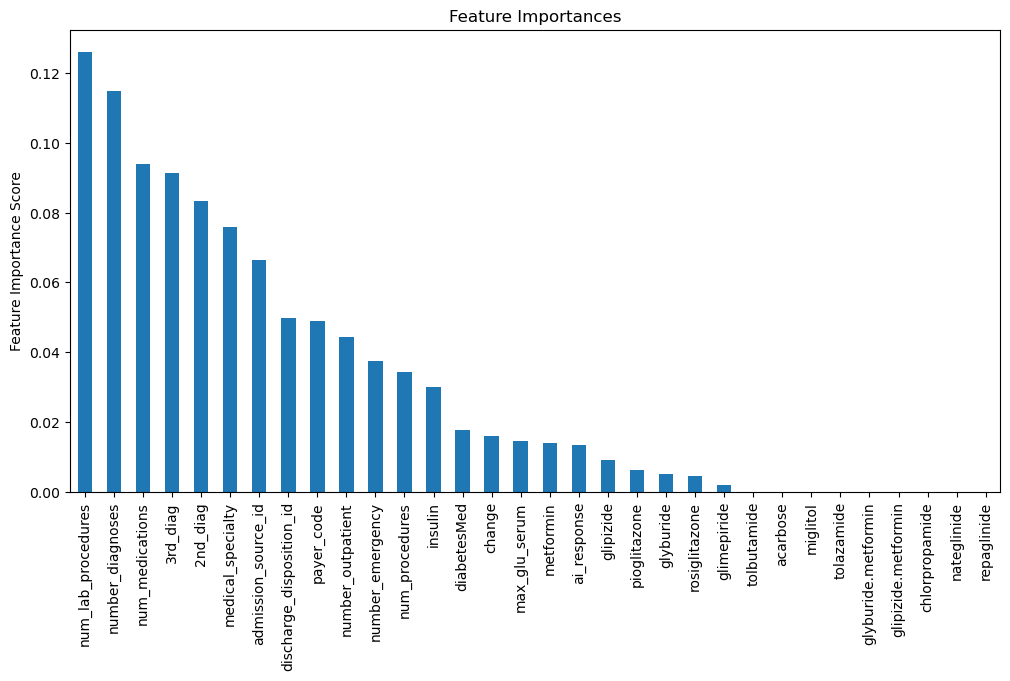

In [109]:
predictors = [x for x in X_train_new_df.columns]

feat_imp = pd.Series(final_model.feature_importances_, predictors).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

* **Num_lab_procedures** has the most influence in predicting the test data
* Diabetes prescriptions (the last 9 features in the plot) have no importance in training the model

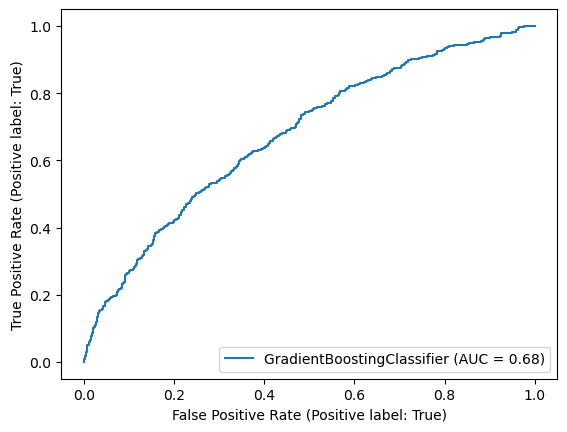

In [110]:
# plot AUC curve here
from sklearn.metrics import RocCurveDisplay

final_dis = RocCurveDisplay.from_estimator(final_model, X_test_new_df, y_test)
plt.show()

### Conclusion
* In this project, I used Diabetes Patient dataset to build a Readmitted Prediction, where I have acheived the best prediction performance using Gradient Boosting classifier with an AUC score of 0.67562
* In the original dataset, there are 40 columns. I dropped the 7 colummns that contain 1 unique value because they will not have any impact in training the model
* For columns contain '?', NaN as missing values, I replaced them with 'missing' word instead of excluding them despite their high percentage of missing values
* The model performance can be improved if I excluded the last 9 features in the 'Feature Importance' plot before training the model

## This is the process for 2k dataset

In [111]:
df2 = pd.read_csv('2k_diabetes_test_no_label.csv')

In [112]:
df2.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,2nd_diag,3rd_diag,ai_response
0,Discharged/transferred to home with home healt...,NaN,MC,Family/GeneralPractice,12,0,21,0,0,9,...,No,No,No,No,No,No,Yes,428,481,"Based on the information provided, the patient..."
1,Discharged to home,NaN,?,Family/GeneralPractice,54,0,10,0,0,9,...,No,No,No,No,No,No,No,428,70,"Based on the information provided, it is not p..."
2,Discharged/transferred to a long term care hos...,Physician Referral,MC,Surgery-Cardiovascular/Thoracic,45,2,44,0,0,9,...,No,No,No,No,No,Ch,Yes,511,997,"With a diagnosis code of 428 (heart failure), ..."


In [113]:
df2.nunique()

discharge_disposition_id      18
admission_source_id            9
payer_code                    16
medical_specialty             35
num_lab_procedures            94
num_procedures                 7
num_medications               57
number_outpatient             15
number_emergency              10
number_diagnoses               9
max_glu_serum                  3
metformin                      4
repaglinide                    4
nateglinide                    2
chlorpropamide                 2
glimepiride                    4
acetohexamide                  1
glipizide                      4
glyburide                      4
tolbutamide                    2
pioglitazone                   4
rosiglitazone                  4
acarbose                       2
miglitol                       2
troglitazone                   1
tolazamide                     1
examide                        1
citoglipton                    1
insulin                        4
glyburide.metformin            3
glipizide.

In [114]:
drop_list2 = []
for col in df2.columns:
    if col in ['tolazamide',  'glipizide.metformin']:
        continue
    if len(df2[col].unique()) == 1:
        drop_list2.append(col)
        df2.drop(col,inplace=True,axis=1)

* **Even though 'tolazamide' and 'glipizide.metformin' columns have 1 unique value in this 2k dataset, I didn't drop them because they are included in the trained model, excluding them will cause error**

In [116]:
df2.columns

Index(['discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_diagnoses', 'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'insulin', 'glyburide.metformin',
       'glipizide.metformin', 'change', 'diabetesMed', '2nd_diag', '3rd_diag',
       'ai_response'],
      dtype='object')

In [117]:
df2.shape

(2000, 32)

In [118]:
df2.replace("?", 'missing', inplace = True)
df2 = df2.fillna('missing')

In [119]:
df2.head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
0,Discharged/transferred to home with home healt...,missing,MC,Family/GeneralPractice,12,0,21,0,0,9,...,No,No,Steady,No,No,No,Yes,428,481,"Based on the information provided, the patient..."
1,Discharged to home,missing,missing,Family/GeneralPractice,54,0,10,0,0,9,...,No,No,No,No,No,No,No,428,70,"Based on the information provided, it is not p..."
2,Discharged/transferred to a long term care hos...,Physician Referral,MC,Surgery-Cardiovascular/Thoracic,45,2,44,0,0,9,...,No,No,Down,No,No,Ch,Yes,511,997,"With a diagnosis code of 428 (heart failure), ..."


In [120]:
# replace rows contain 'Hospice ...' to 'Hospice'
df2['discharge_disposition_id'] = df2['discharge_disposition_id'].replace([
    'Hospice / home', 'Hospice / medical facility'
], 'Hospice')


# replace rows contain 'Admitted ... ' to 'Admitted'
df2['discharge_disposition_id'] = df2['discharge_disposition_id'].replace(
    'Admitted as an inpatient to this hospital', 'Admitted')

print(len(df2['discharge_disposition_id'].unique()))
df2['discharge_disposition_id'].unique()

18


array(['Discharged/transferred to home with home health service',
       'Discharged to home',
       'Discharged/transferred to a long term care hospital.',
       'Discharged/transferred to another  type of inpatient care institution',
       'missing', 'Discharged/transferred to SNF',
       'Discharged/transferred to another short term hospital', 'Hospice',
       'Expired', 'Discharged/transferred to ICF',
       'Discharged/transferred to another rehab fac including rehab units of a hospital.',
       'Not Mapped', 'Left AMA',
       'Discharged/transferred to home under care of Home IV provider',
       'Discharged/transferred to a federal health care facility.',
       'Discharged/transferred/referred to a psychiatric hospital of a psychiatric distinct part unit of a hospital',
       'Discharged/transferred/referred to this institution for outpatient services',
       'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare'],
   

In [121]:
# removed disposition code with ‘Expired’ & 'Hospice' 
df2 = df2[(df2.discharge_disposition_id != 'Expired') & (df2.discharge_disposition_id != 'Hospice')]

In [122]:
print(df2['discharge_disposition_id'].unique())

['Discharged/transferred to home with home health service'
 'Discharged to home'
 'Discharged/transferred to a long term care hospital.'
 'Discharged/transferred to another  type of inpatient care institution'
 'missing' 'Discharged/transferred to SNF'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to ICF'
 'Discharged/transferred to another rehab fac including rehab units of a hospital.'
 'Not Mapped' 'Left AMA'
 'Discharged/transferred to home under care of Home IV provider'
 'Discharged/transferred to a federal health care facility.'
 'Discharged/transferred/referred to a psychiatric hospital of a psychiatric distinct part unit of a hospital'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare']


In [123]:
df2.nunique()

discharge_disposition_id      16
admission_source_id           10
payer_code                    16
medical_specialty             35
num_lab_procedures            94
num_procedures                 7
num_medications               56
number_outpatient             15
number_emergency              10
number_diagnoses               9
max_glu_serum                  4
metformin                      4
repaglinide                    4
nateglinide                    2
chlorpropamide                 2
glimepiride                    4
glipizide                      4
glyburide                      4
tolbutamide                    2
pioglitazone                   4
rosiglitazone                  4
acarbose                       2
miglitol                       2
tolazamide                     1
insulin                        4
glyburide.metformin            3
glipizide.metformin            1
change                         2
diabetesMed                    2
2nd_diag                     247
3rd_diag  

In [124]:
# determine categorical and numerical features
numerical_features = df2.select_dtypes('number').columns
categorical_features = df2.select_dtypes('object').columns

In [125]:
cat_feat2 = df2[categorical_features].nunique()
cat_feat2

discharge_disposition_id      16
admission_source_id           10
payer_code                    16
medical_specialty             35
max_glu_serum                  4
metformin                      4
repaglinide                    4
nateglinide                    2
chlorpropamide                 2
glimepiride                    4
glipizide                      4
glyburide                      4
tolbutamide                    2
pioglitazone                   4
rosiglitazone                  4
acarbose                       2
miglitol                       2
tolazamide                     1
insulin                        4
glyburide.metformin            3
glipizide.metformin            1
change                         2
diabetesMed                    2
2nd_diag                     247
3rd_diag                     263
ai_response                 1858
dtype: int64

In [126]:
high_arr2, mid_arr2, low_arr2 = [], [], []

for i, t in cat_feat2.items():
    if t <= 2:
        low_arr2.append(i)
    elif t <= 4:
        mid_arr2.append(i)
    else:
        high_arr2.append(i)
print(low_arr2, '\n', mid_arr2, high_arr2)

['nateglinide', 'chlorpropamide', 'tolbutamide', 'acarbose', 'miglitol', 'tolazamide', 'glipizide.metformin', 'change', 'diabetesMed'] 
 ['max_glu_serum', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'glyburide.metformin'] ['discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', '2nd_diag', '3rd_diag', 'ai_response']


In [127]:
# encode high cardinality features
categorical_features_only_2 = high_arr2[:-1]

df2[categorical_features_only_2] = categorical_transformer.transform(df2[categorical_features_only_2])

In [129]:
df2[categorical_features_only_2].head(3)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,2nd_diag,3rd_diag
0,722.0,589,1555,545.0,477.0,6.0
1,3901.0,589,3346,545.0,477.0,29.0
2,29.0,1903,1555,63.0,18.0,57.0


In [130]:
# encode low cardinality features
df2[low_arr2] = df2[low_arr2].replace({'No': 0, 'Ch': 1, 'Steady': 1, 'Yes': 1}).astype(int)

In [131]:
df2[low_arr2].head(3)

,nateglinide,chlorpropamide,tolbutamide,acarbose,miglitol,tolazamide,glipizide.metformin,change,diabetesMed
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1


In [132]:
# encode the rest
df2[mid_arr2] = df2[mid_arr2].replace({'missing': 0,'No': 0, 
                          'Down': 1, 'Norm': 1, 
                          '>200': 2, '>300': 3,
                          'Steady': 2, 'Up': 3}).astype(int)


In [133]:
df2[mid_arr2].head(3)

,max_glu_serum,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide.metformin
0,2,0,0,0,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,2,2,0,0,1,0


In [134]:
# scale numerical features
df2[numerical_features] = numerical_transformer.transform(df2[numerical_features])

In [135]:
df2.head(2)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
0,722.0,589,1555,545.0,-1.595454,-0.823815,0.654797,-0.286904,-0.229246,0.984454,...,0,0,2,0,0,0,1,477.0,6.0,"Based on the information provided, the patient..."
1,3901.0,589,3346,545.0,0.561254,-0.823815,-0.664973,-0.286904,-0.229246,0.984454,...,0,0,0,0,0,0,0,477.0,29.0,"Based on the information provided, it is not p..."


In [136]:
# remove stopwords in text data
df2['ai_response'] = df2['ai_response'].apply(lambda text: remove_stopwords(text))

In [137]:
# lemmatize text in text data
df2['ai_response'] = df2['ai_response'].apply(lambda text: lemmatize_words(text))

In [138]:
df2['ai_response']

0       Based information provided, patient diagnosis ...
1       Based information provided, possible accuratel...
2       With diagnosis code 428 (heart failure), patie...
3       Based diagnosis code 250.82, indicate type 2 d...
4       Based information provided, patient diagnosis ...
                              ...                        
1995    Based information provided, patient diagnosis ...
1996    Based information provided, diagnosis code 250...
1997    I recommend keep patient hospital information ...
1998    Based information provided, patient diagnosis ...
1999    Based diagnosis code 410 (acute myocardial inf...
Name: ai_response, Length: 1947, dtype: object

In [139]:
# tf-idf vectorized text data
df2_tf = tf.transform(df2['ai_response'])

In [140]:
# make predictions with lr model
df2_tf_pred = lr.predict(df2_tf)

In [141]:
print(len(df2_tf_pred))

1947


In [142]:
df2_new = df2.drop('ai_response', axis=1)

In [143]:
df2_new.head(2)

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,acarbose,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag
0,722.0,589,1555,545.0,-1.595454,-0.823815,0.654797,-0.286904,-0.229246,0.984454,...,0,0,0,2,0,0,0,1,477.0,6.0
1,3901.0,589,3346,545.0,0.561254,-0.823815,-0.664973,-0.286904,-0.229246,0.984454,...,0,0,0,0,0,0,0,0,477.0,29.0


In [144]:
# stack text data predictions in the new data
df2_new = np.concatenate((df2_new, df2_tf_pred.reshape(-1, 1)), axis=1)

In [145]:
# create new data for meta model to predict
df2_new_df = pd.DataFrame(df2_new, columns=df2.columns)

In [146]:
df2_new_df.head()

,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_diagnoses,...,miglitol,tolazamide,insulin,glyburide.metformin,glipizide.metformin,change,diabetesMed,2nd_diag,3rd_diag,ai_response
0,722.0,589.0,1555.0,545.0,-1.595454,-0.823815,0.654797,-0.286904,-0.229246,0.984454,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,477.0,6.0,1.0
1,3901.0,589.0,3346.0,545.0,0.561254,-0.823815,-0.664973,-0.286904,-0.229246,0.984454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,477.0,29.0,1.0
2,29.0,1903.0,1555.0,63.0,0.099103,0.347670,3.414316,-0.286904,-0.229246,0.984454,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,18.0,57.0,0.0
3,105.0,3059.0,3346.0,2530.0,1.177457,-0.238072,-0.544994,-0.286904,-0.229246,0.984454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,11.0,0.0
4,3901.0,3059.0,3346.0,1195.0,0.818005,-0.823815,0.534818,-0.286904,-0.229246,0.984454,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,75.0,373.0,0.0


In [147]:
# make predictions for this new set
df2_pred = final_model.predict_proba(df2_new_df)[:, 1]

In [148]:
# store prediction probabilities to csv
result = pd.DataFrame(df2_pred)
result.index = df2_new_df.index
result.columns = ["prediction"]
result.to_csv("prediction_results.csv")